In [1]:
#some code from Exploring_PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

tqdm.pandas()

%matplotlib inline

SEED = 42

NUM_FEATURES = 5000
NUM_CLASSES = 3993

features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

All code in this part is taken from Exploring_PCA. Instead of 2500 components(which we know is enough), just tried 5000 components for conclusiveness sake. Takes a few minutes to run, just so we have a graph for every feature rather than half of the feature(maybe for the report?)

In [2]:
scaler = StandardScaler(with_std=False)
features_centered = scaler.fit_transform(features)

n_components = len(features.columns)
#use all features
pca = PCA(n_components=n_components)
features_reduced = pca.fit_transform(features_centered)
features_reduced = pd.DataFrame(features_reduced)

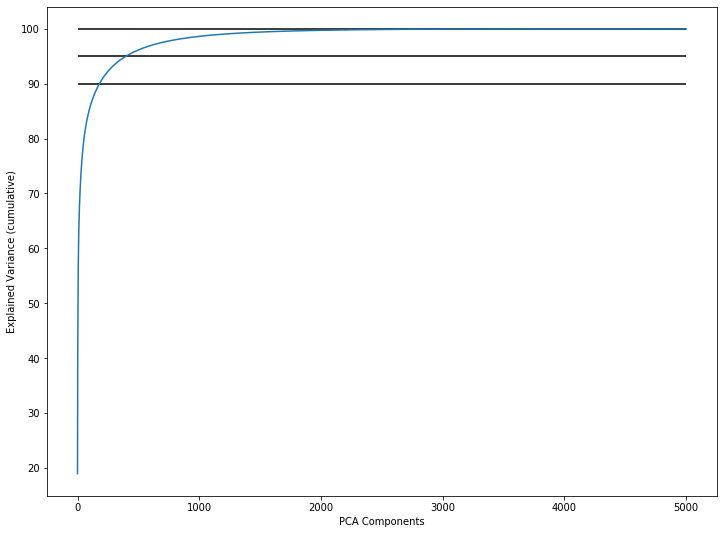

In [3]:
plt.figure(figsize=(12, 9))
plt.plot(pca.explained_variance_ratio_.cumsum() * 100)
plt.hlines([90, 95, 100], 0, n_components)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance (cumulative)")
plt.show()

In [4]:
5000 - (pca.explained_variance_ratio_.cumsum()*100 >= 90).sum()

181

We see that we only need 181 features to explain 90 percent of data variance, so reduce dimensionality to only 181 features, and then try a a baseline classifier.

In [2]:
scaler = StandardScaler(with_std=False)
features_centered = scaler.fit_transform(features)

n_components = 181
reduced_pca = PCA(n_components = n_components)
reduced_df = reduced_pca.fit_transform(features_centered)

In [6]:
reduced_df  = pd.DataFrame(reduced_df)

In [7]:
reduced_df.shape

(15511, 181)

Save reduced features in case need to work on it later in a different file.

In [33]:
reduced_df.to_csv(f"../data/expanded/reduced_features.csv", index=False, header=False)

## Model Training

Tried Baseline Model OvR classifier with logistic to see if there is equal performance with reduced time, however this time with a 70-30 train-test-split. Used SEED for the random seed.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import time

In [6]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df, labels, test_size = 0.3, random_state = SEED)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
start_time = time.time()
model = OneVsRestClassifier(LogisticRegression(random_state=SEED)).fit(X_train,y_train)
end_time = time.time()

Remove convergance warnings(from Eelis's example, we know that it will not converge anyways)

start time 7:41 EST

hasn't finished after 1 hour and 20 minutes, maybe approach it differently